In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import pickle

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

from sklearn import set_config; set_config(display='diagram')


In [2]:
df = pd.read_csv('../../raw_data/huggingface.co_human_ai_generated_text/model_training_dataset_enriched.csv')
print(df.shape)
print(df.columns)

(2000000, 11)
Index(['Unnamed: 0', 'id', 'text', 'generated', 'punctuations_nb',
       'neg_sentiment_polarity', 'pos_sentiment_polarity',
       'text_corrections_nb', 'text_repetitions_nb', 'number_of_sentences',
       'text_lenght'],
      dtype='object')


In [3]:
df['repetitions_ratio'] = df['text_repetitions_nb']/df['text_lenght']
df['punctuations_ratio'] = df['punctuations_nb']/df['text_lenght']
df['text_corrections_ratio'] = df['text_corrections_nb']/df['text_lenght']
df['text_corrections_set_ratio'] = df['text_corrections_nb']/df['number_of_sentences']
df['average_neg_sentiment_polarity'] = df['neg_sentiment_polarity']/df['text_lenght']

<Axes: xlabel='generated', ylabel='text_corrections_ratio'>

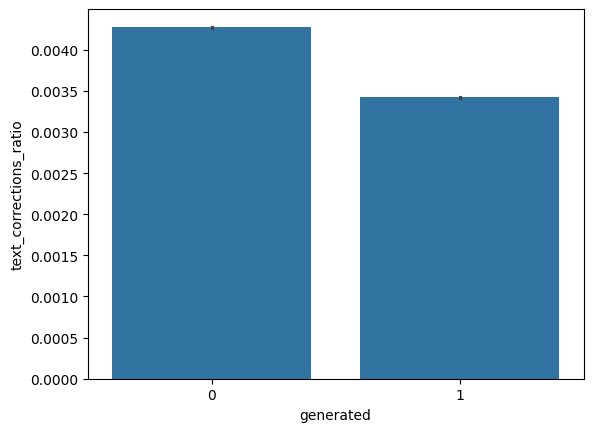

In [4]:
sns.barplot(data=df, x="generated", y="text_corrections_ratio")

In [5]:
AI_Human_enriched_df = pd.read_csv('../../raw_data/kaggle-ai-generated-vs-human-text/AI_Human_enriched.csv')
AI_Human_enriched_df.generated.value_counts()

generated
0.0    305797
1.0    181438
Name: count, dtype: int64

In [6]:
AI_Human_enriched_df.columns

Index(['Unnamed: 0', 'text', 'generated', 'punctuations_nb',
       'neg_sentiment_polarity', 'pos_sentiment_polarity',
       'text_corrections_nb', 'text_repetitions_nb', 'number_of_sentences',
       'text_lenght'],
      dtype='object')

In [7]:
AI_Human_enriched_df['repetitions_ratio'] = AI_Human_enriched_df['text_repetitions_nb']/AI_Human_enriched_df['text_lenght']
AI_Human_enriched_df['punctuations_ratio'] = AI_Human_enriched_df['punctuations_nb']/AI_Human_enriched_df['text_lenght']
AI_Human_enriched_df['text_corrections_ratio'] = AI_Human_enriched_df['text_corrections_nb']/AI_Human_enriched_df['text_lenght']
AI_Human_enriched_df['text_corrections_set_ratio'] = AI_Human_enriched_df['text_corrections_nb']/AI_Human_enriched_df['number_of_sentences']
AI_Human_enriched_df['average_sentence_lenght'] = AI_Human_enriched_df['text_lenght']/AI_Human_enriched_df['number_of_sentences']
AI_Human_enriched_df['average_neg_sentiment_polarity'] = AI_Human_enriched_df['neg_sentiment_polarity']/AI_Human_enriched_df['text_lenght']

<Axes: xlabel='generated', ylabel='average_neg_sentiment_polarity'>

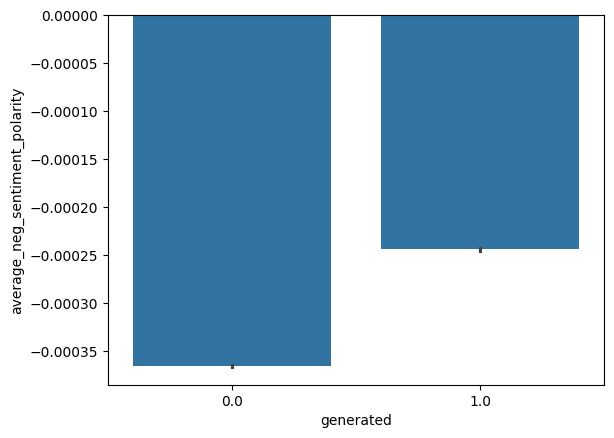

In [8]:
sns.barplot(data=AI_Human_enriched_df, x="generated", y="average_neg_sentiment_polarity")

In [9]:
daigt_v2_enriched_df = pd.read_csv('../../raw_data/daigt-v2-train-dataset/train_v2_drcat_02_enriched.csv')
daigt_v2_enriched_df['repetitions_ratio'] = daigt_v2_enriched_df['text_repetitions_nb']/daigt_v2_enriched_df['text_lenght']
daigt_v2_enriched_df['punctuations_ratio'] = daigt_v2_enriched_df['punctuations_nb']/daigt_v2_enriched_df['text_lenght']
daigt_v2_enriched_df['text_corrections_ratio'] = daigt_v2_enriched_df['text_corrections_nb']/daigt_v2_enriched_df['text_lenght']
daigt_v2_enriched_df['text_corrections_set_ratio'] = daigt_v2_enriched_df['text_corrections_nb']/daigt_v2_enriched_df['number_of_sentences']
daigt_v2_enriched_df['average_neg_sentiment_polarity'] = daigt_v2_enriched_df['neg_sentiment_polarity']/daigt_v2_enriched_df['text_lenght']
daigt_v2_enriched_df['repetitions_ratio'].mean()

np.float64(0.053504115447872404)

In [10]:
# big_df = pd.concat(objs=[df, daigt_v2_enriched_df, AI_Human_enriched_df])
big_df = pd.concat(objs=[df, AI_Human_enriched_df, daigt_v2_enriched_df])
big_df = big_df[np.isinf(big_df['average_sentence_lenght']) == False]

In [11]:
big_df.generated.value_counts()

generated
0.0    1305797
1.0    1226302
Name: count, dtype: int64

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report


In [13]:
pipeline_naive_bayes = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)

X = big_df['text']
y = big_df['generated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

results = cross_validate(estimator=pipeline_naive_bayes, X=X, y=y, cv=5, verbose=10)
print(results['test_score'].mean())

# print(classification_report(y_test,y_pred))

0.9531147217196049


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

pipeline_linear_regression = make_pipeline(
    RobustScaler(),
    LogisticRegression()
)

big_df['repetitions_ratio'] = big_df['text_repetitions_nb']/big_df['text_lenght']
big_df['punctuations_ratio'] = big_df['punctuations_nb']/big_df['text_lenght']
big_df['text_corrections_ratio'] = big_df['text_corrections_nb']/big_df['text_lenght']
big_df['average_sentence_lenght'] = big_df['text_lenght']/big_df['number_of_sentences']
big_df['average_neg_sentiment_polarity'] = big_df['neg_sentiment_polarity']/big_df['text_lenght']

X = big_df[[
    'repetitions_ratio',
    'punctuations_ratio',
    'text_corrections_ratio',
    'average_sentence_lenght',
    'average_neg_sentiment_polarity',
]]
print(X.shape)
y = big_df['generated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

results = cross_validate(estimator=pipeline_linear_regression, X=X, y=y, cv=5, verbose=10)
print(results['test_score'].mean())

(2532099, 5)
(2025679, 5)
(506420, 5)
[CV] START .....................................................................
[CV] END ......................................., score=0.901 total time=   1.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.2s


[CV] END ......................................., score=0.901 total time=   1.0s
[CV] START .....................................................................
[CV] END ......................................., score=0.901 total time=   1.0s
[CV] START .....................................................................
[CV] END ......................................., score=0.883 total time=   1.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    4.4s


[CV] END ......................................., score=0.599 total time=   1.1s
0.8369043873002537


In [18]:
big_df.drop(columns=['id', 'text', 'Unnamed: 0']).corr()

,generated,punctuations_nb,neg_sentiment_polarity,pos_sentiment_polarity,text_corrections_nb,text_repetitions_nb,number_of_sentences,text_lenght,repetitions_ratio,punctuations_ratio,text_corrections_ratio,text_corrections_set_ratio,average_neg_sentiment_polarity,average_sentence_lenght
generated,1.000000,-0.351440,0.338292,-0.370833,-0.284074,-0.567460,-0.434819,-0.474395,-0.652845,0.077797,-0.116682,-0.117094,0.226944,-0.080798
punctuations_nb,-0.351440,1.000000,-0.456696,0.597531,0.496493,0.762899,0.810837,0.796345,0.468683,0.507436,0.116104,-0.029862,-0.178026,-0.125856
neg_sentiment_polarity,0.338292,-0.456696,1.000000,-0.256792,-0.230069,-0.434616,-0.584910,-0.414961,-0.337765,-0.169857,-0.045119,0.079154,0.854258,0.188944
pos_sentiment_polarity,-0.370833,0.597531,-0.256792,1.000000,0.279743,0.626568,0.764526,0.604703,0.464573,0.146748,0.004214,-0.128919,-0.038029,-0.244626
text_corrections_nb,-0.284074,0.496493,-0.230069,0.279743,1.000000,0.487195,0.415034,0.520598,0.298368,0.099236,0.792919,0.532355,-0.065123,0.072279
text_repetitions_nb,-0.567460,0.762899,-0.434616,0.626568,0.487195,1.000000,0.772164,0.933744,0.750939,-0.004990,0.052222,0.059525,-0.124474,0.061482
number_of_sentences,-0.434819,0.810837,-0.584910,0.764526,0.415034,0.772164,1.000000,0.766402,0.548787,0.260409,0.061010,-0.147444,-0.304242,-0.322117
text_lenght,-0.474395,0.796345,-0.414961,0.604703,0.520598,0.933744,0.766402,1.000000,0.529629,-0.031210,0.045645,0.073046,-0.081721,0.098254
repetitions_ratio,-0.652845,0.468683,-0.337765,0.464573,0.298368,0.750939,0.548787,0.529629,1.000000,0.045238,0.081557,0.041392,-0.198838,-0.021849
punctuations_ratio,0.077797,0.507436,-0.169857,0.146748,0.099236,-0.004990,0.260409,-0.031210,0.045238,1.000000,0.141885,-0.134650,-0.198301,-0.316597


In [16]:
%%time

# TExt cleaning
# https://www.kaggle.com/code/sudalairajkumar/getting-started-with-text-preprocessing

# algo to detect spelling mistakes
#

from nltk.corpus import words
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')

from nltk.corpus import wordnet
wordnet_words = list(wordnet.words())
print(wordnet_words[:10])  # Affiche les 10 premiers mots de WordNet

from nltk.stem import *
# stemmer = PorterStemmer()
stemmer = SnowballStemmer("english")

from textblob import TextBlob

text = """
        Also they feel more comfortable at home. Some school have decreased bullying and high and middle school because some students get bullied. Some Schools offter distance learning as an option for students to attend classes from home by way of online or video conferencing. Students can ncreased to learn at home. Also is more hard to students understand by online. students get distract at home. Some schools in United States ofter classes from home because is good option to students . Also students can stay more relaxing from home. Students don't want to go more at school and they want to get classes at home. Students get fall in environment learning. But students can get relaxing at home.

Students can get distract at home because they have easy to use phones. If students sleep in class they want to sleep at home too. They feel more bored at home because they need stay at home more time. Also students don't do anything at home because if they stay at home is esay to get more distract. Students can get fall in environment learning and is hard they learn at home. Students have more time to do homework. Also they don't want to learn by online. Also many students have hard time in class to understand that teacher explain in more hard they learn at home.

Some schools affter classes from home because they think is good option to students. If they get classes at home they don't learning. Many students work and they would tired and they don't want to learn.

Students don't pay attention in class they too don't pay attention at home because is more hard. But students get more distract stay near the family and they don't want to pay attention.

Conclude if students get classes from home by online they don't want to pay attention because is more easy they get distract. Students feel more pressure at home. Also they want to play or use phone and not is good option to students get class at home they get distration and decrease to learning. Also students get frustration in class because they don't understand but if they get classes in online they don't learning too because is more hard they learning from home.. Also they want to listening to music or play.

Students fall in environment learning because they learn at class when the teacher explain if students attend classes from home by online is hard they learn. Also student sleep more and stay with more energy to receive the class by online. Also they feel safe at home with their family"
"""

text_ai = """
Therefore, when it comes to allowing students the option to attend classes from home, there are intricacies that need to be taken into consideration in order to ensure that the best decision is made. Ultimately, this decision will depend on the individual student and their ability to take advantage of the opportunities available to them..

However, in the end, the effect that home-based classes will have on learning is largely dependent on the situation of the student. On the other hand, there could be a lack of social interaction with classmates, a lack of guidance from instructors, and potential technical issues as well. For example, those who are already motivated to learn and are self-disciplined may reap the full benefits of studying in the comfort of their own home. Conversely, for those who require more interaction and guidance that comes with physical classrooms, a home-based learning style may not be as effective. On the one hand, it eliminates the need for physical attendance to classrooms, reduces the psychology of peer pressure, and eliminates potential health risks resulting from attending crowded places. In addition, students have the opportunity to arrange their learning environment according to their preferences and better manage their own time.
When considering the pros and cons of attending classes from home, there is no doubt that there are a variety of advantages and disadvantages
"""
words_dict = {}
for w in words.words():
    words_dict[w]=w

for w in list(wordnet_words):
    words_dict[w]=w

words_set = set(words_dict.values())


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['.22-caliber', '.22-calibre', '.22_caliber', '.22_calibre', '.38-caliber', '.38-calibre', '.38_caliber', '.38_calibre', '.45-caliber', '.45-calibre']
CPU times: user 2.79 s, sys: 223 ms, total: 3.01 s
Wall time: 3.5 s


In [17]:
# entropy?
# perplexity?


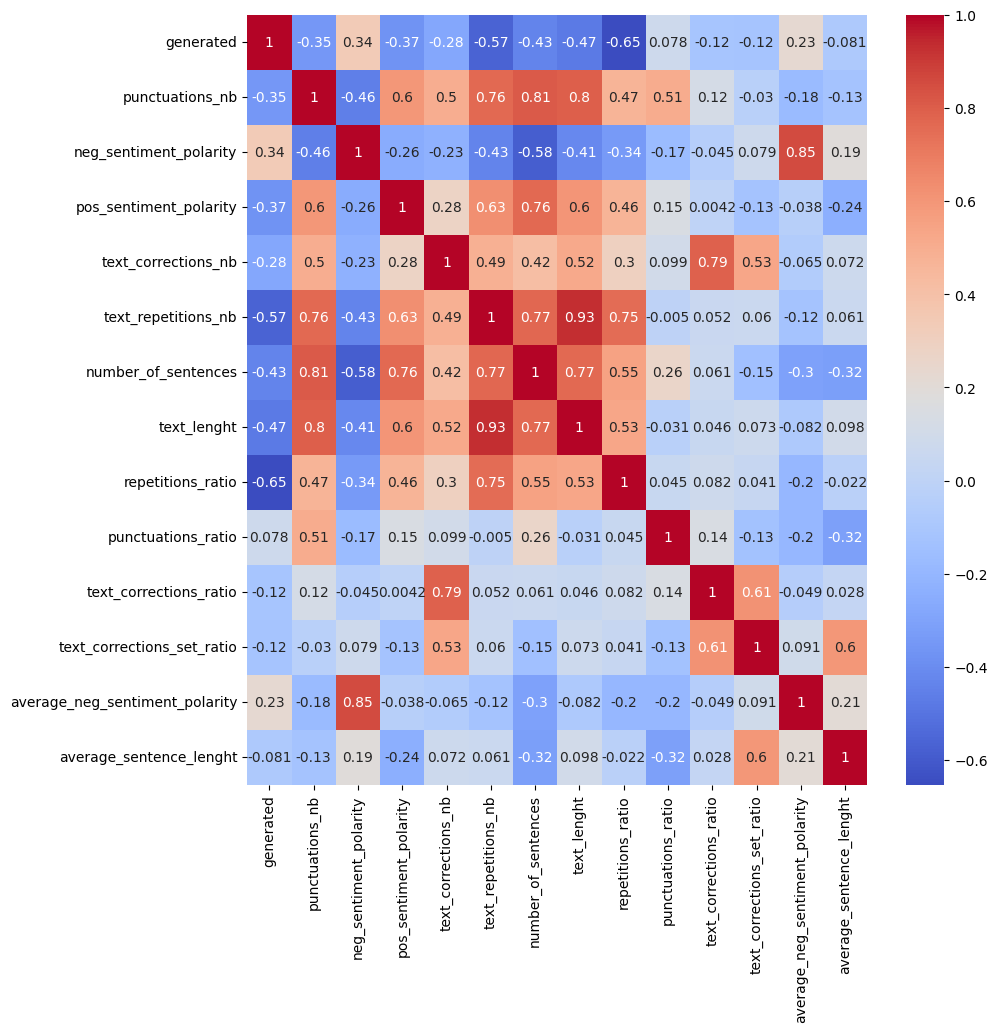

In [19]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    big_df.drop(columns=['id', 'text', 'Unnamed: 0']).corr(),
    cmap = 'coolwarm',
    annot = True,
    annot_kws = {"size": 10}
)
plt.show()